$$\textbf{Reconocimiento estadístico de Patrones. Proyecto 2:}$$
$$\textit{Sarahi García}$$

In [1]:
import os
import pandas as pd
import numpy as np
from fasteda import fast_eda
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings

In [3]:
#cargamos los datos
df = pd.read_excel("/Users/ely/Documents/Maestria/segundo_semestre/cimat2023-1/patrones/Proyecto_2/DryBeanDataset/Dry_Bean_Dataset.xlsx")

In [5]:
#clases
df["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [6]:
#número de muestras por clase
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [7]:
#codificamos las etiquetas
labelencoder = LabelEncoder()
df["Class"] = labelencoder.fit_transform(df['Class'])

DataFrame Head:


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5


DataFrame Tail:


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,3


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(13611, 17)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  fl

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
Area,13611,53048.285,44652,29324.096,20420,36328,44652,61332,254616,2.952606,10.796406
Perimeter,13611,855.283,794.941,214.29,524.736,703.523,794.941,977.213,1985.37,1.625944,3.586365
MajorAxisLength,13611,320.142,296.883,85.694,183.601,253.304,296.883,376.495,738.86,1.357666,2.530531
MinorAxisLength,13611,202.271,192.432,44.97,122.513,175.848,192.432,217.032,460.198,2.237964,6.648183
AspectRation,13611,1.583,1.551,0.247,1.025,1.432,1.551,1.707,2.43,0.582509,0.113332
Eccentricity,13611,0.751,0.764,0.092,0.219,0.716,0.764,0.81,0.911,-1.062707,1.386505
ConvexArea,13611,53768.2,45178,29774.916,20684,36714.5,45178,62294,263261,2.941497,10.739253
EquivDiameter,13611,253.064,238.438,59.177,161.244,215.068,238.438,279.446,569.374,1.948743,5.189709
Extent,13611,0.75,0.76,0.049,0.555,0.719,0.76,0.787,0.866,-0.895250,0.642642
Solidity,13611,0.987,0.988,0.005,0.919,0.986,0.988,0.99,0.995,-2.549812,12.794479


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



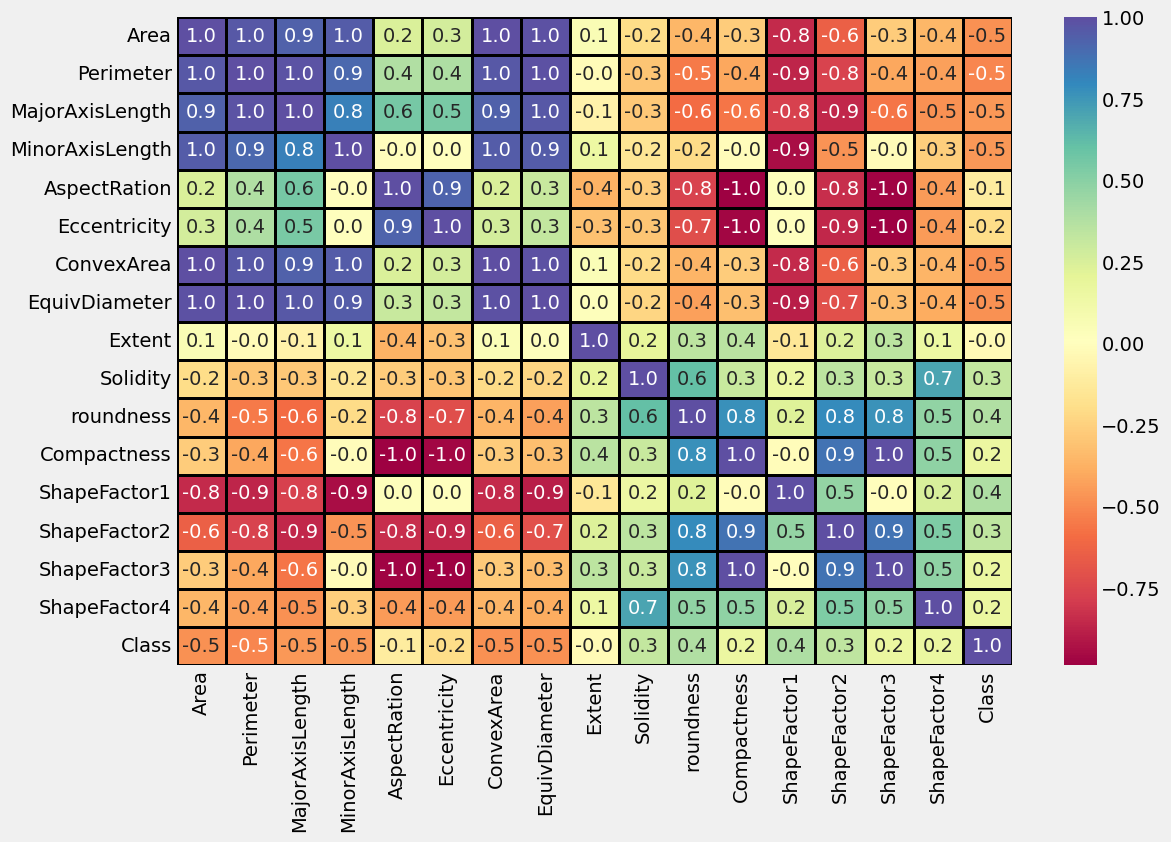

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



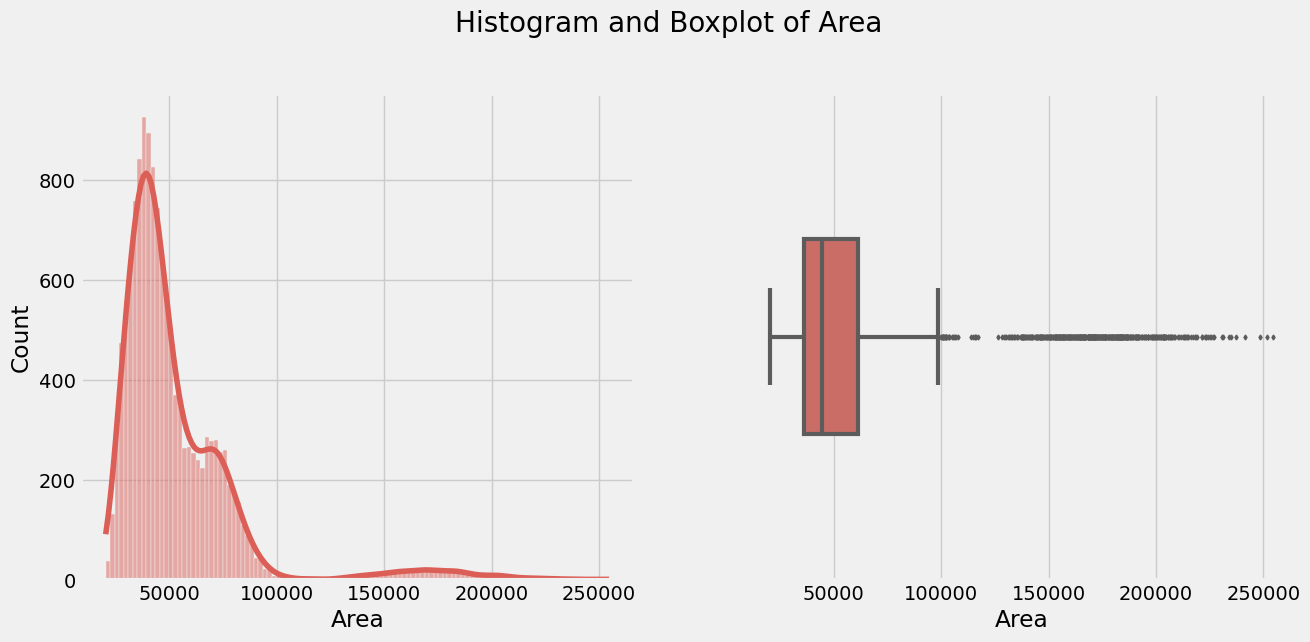

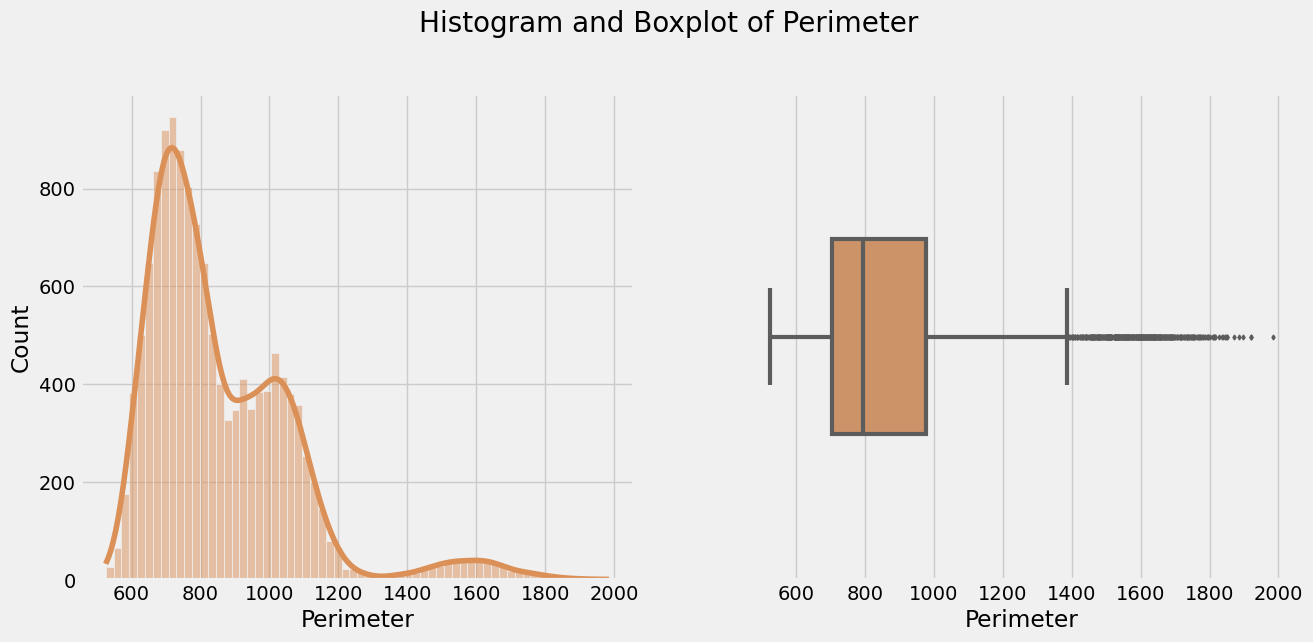

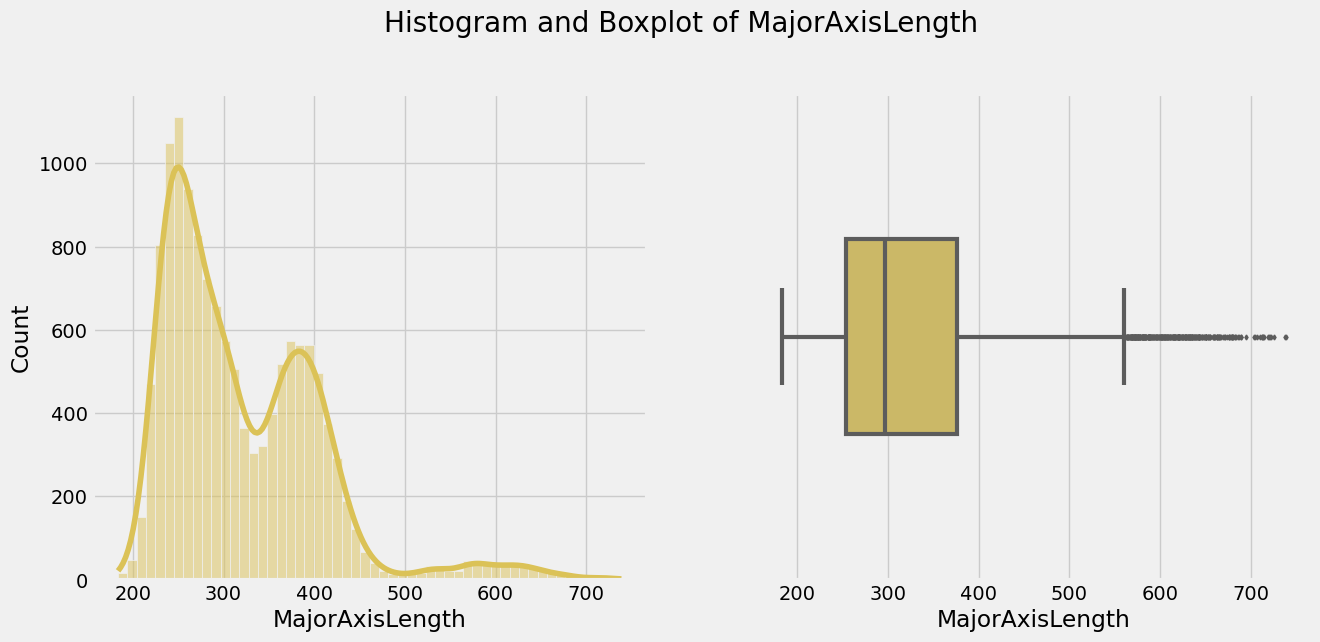

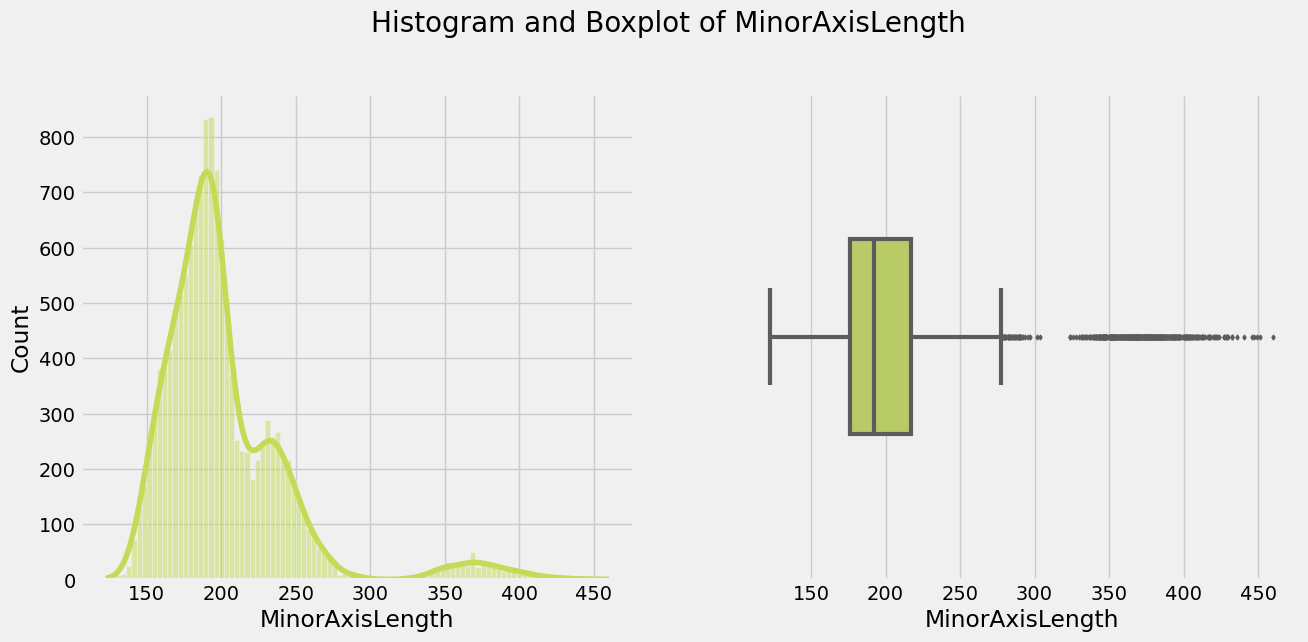

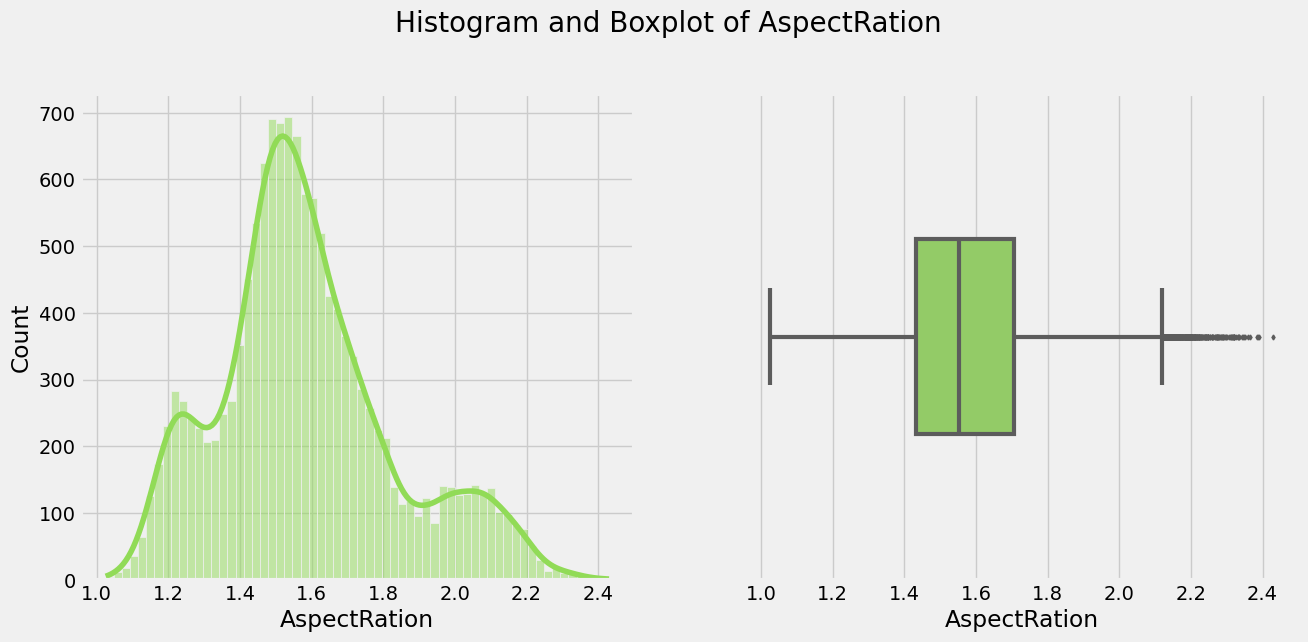

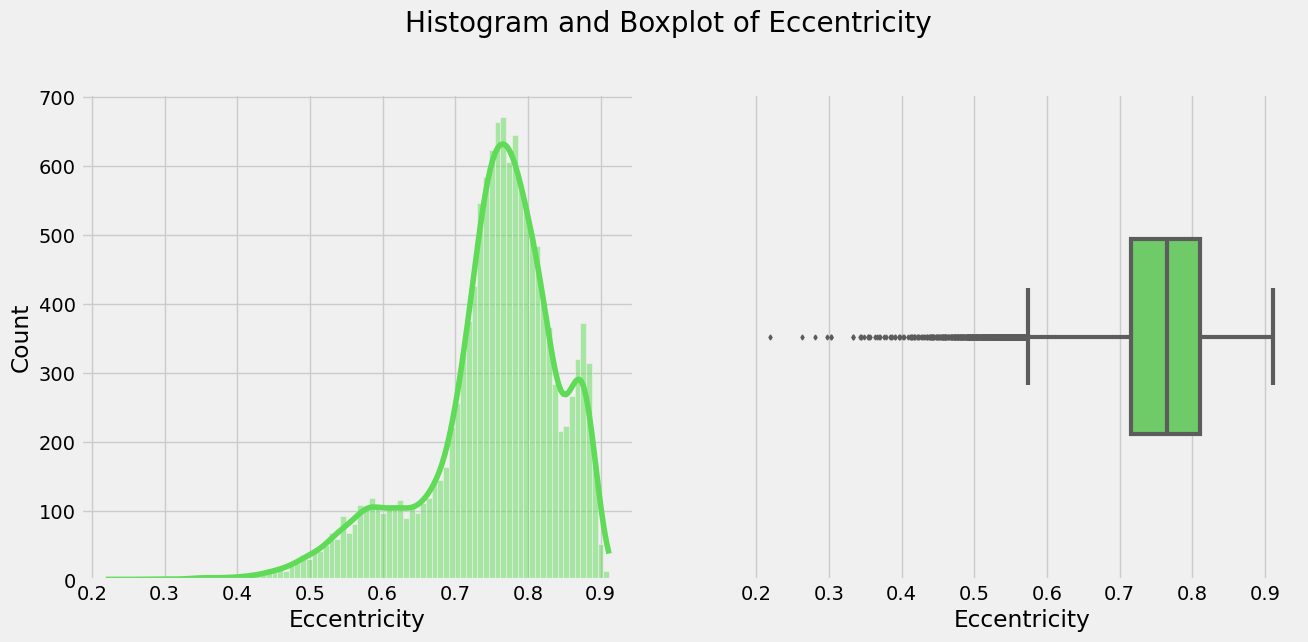

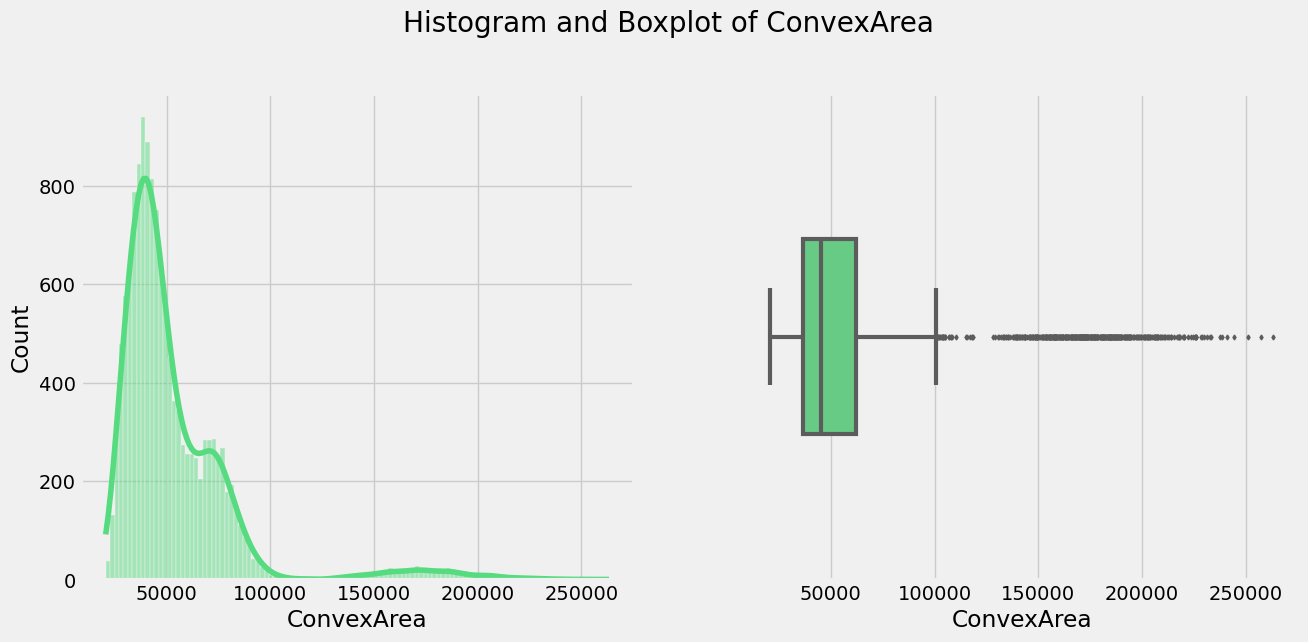

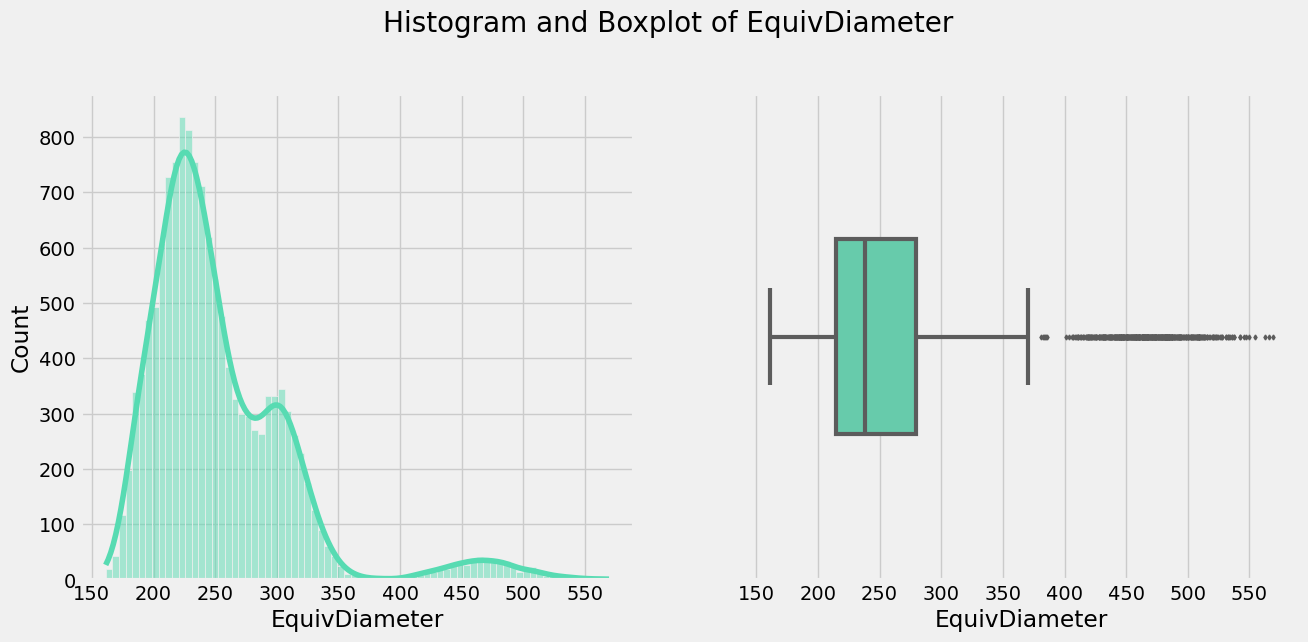

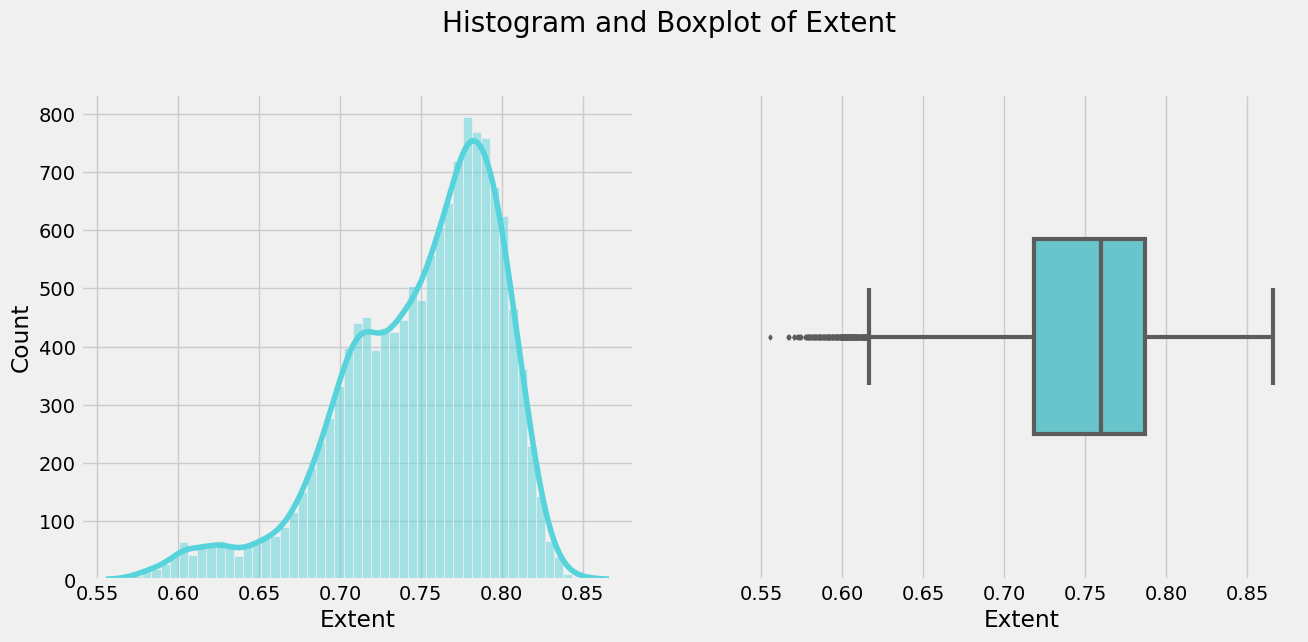

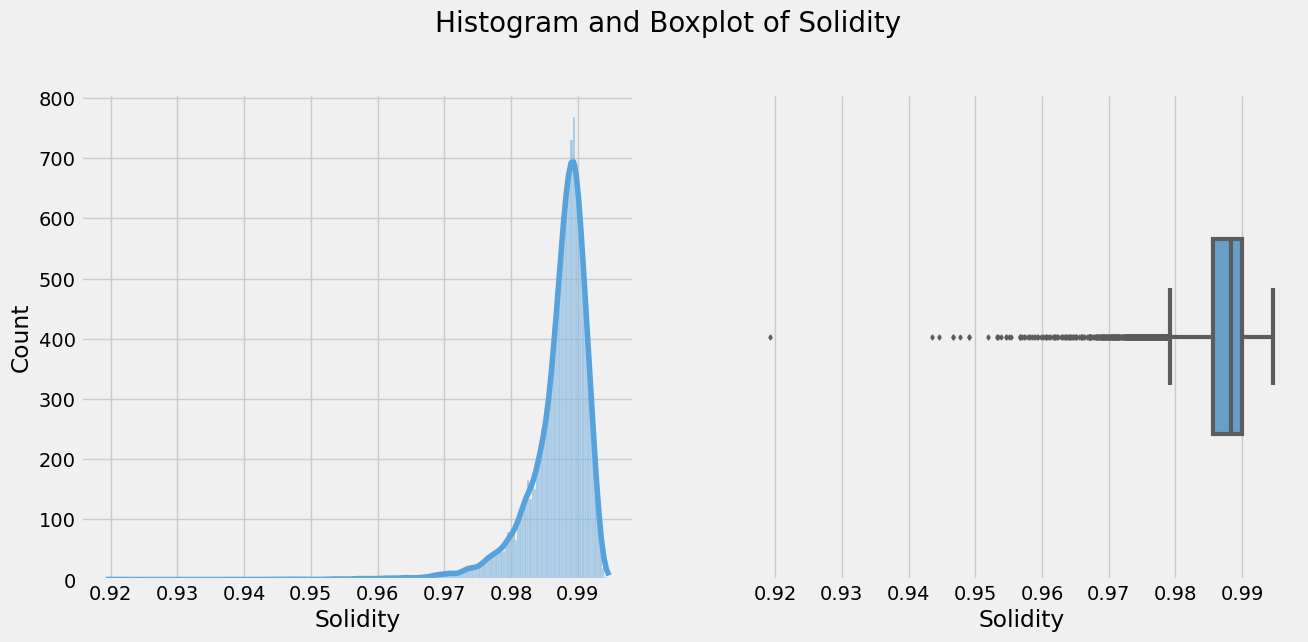

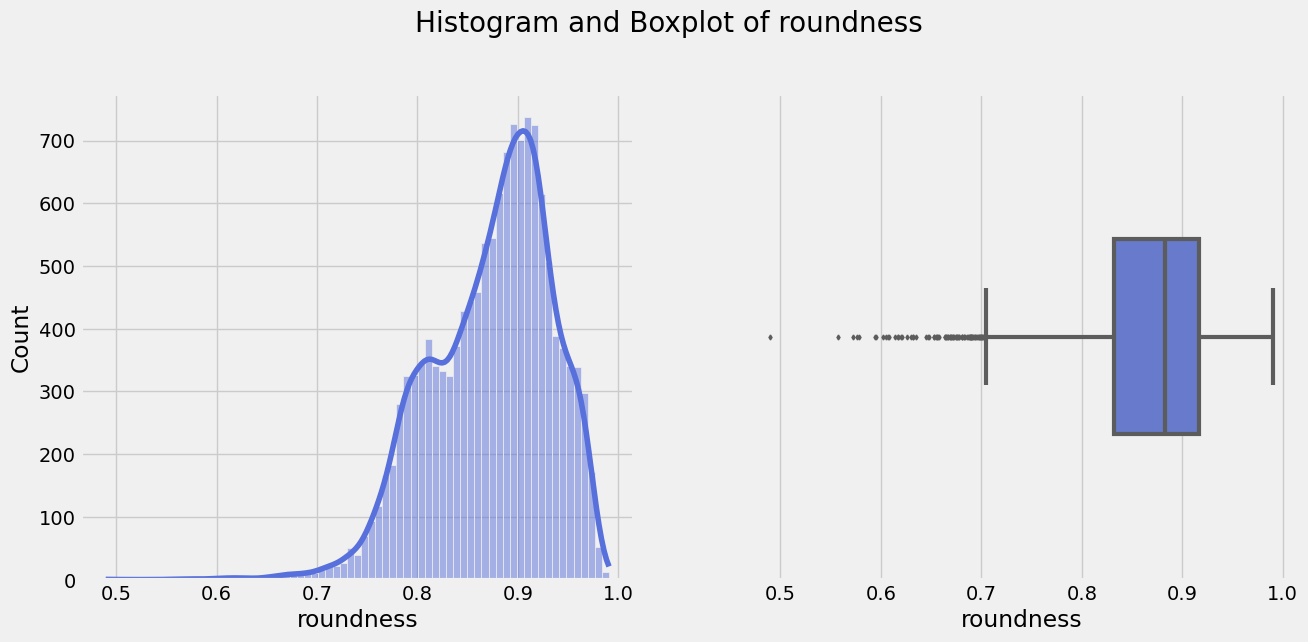

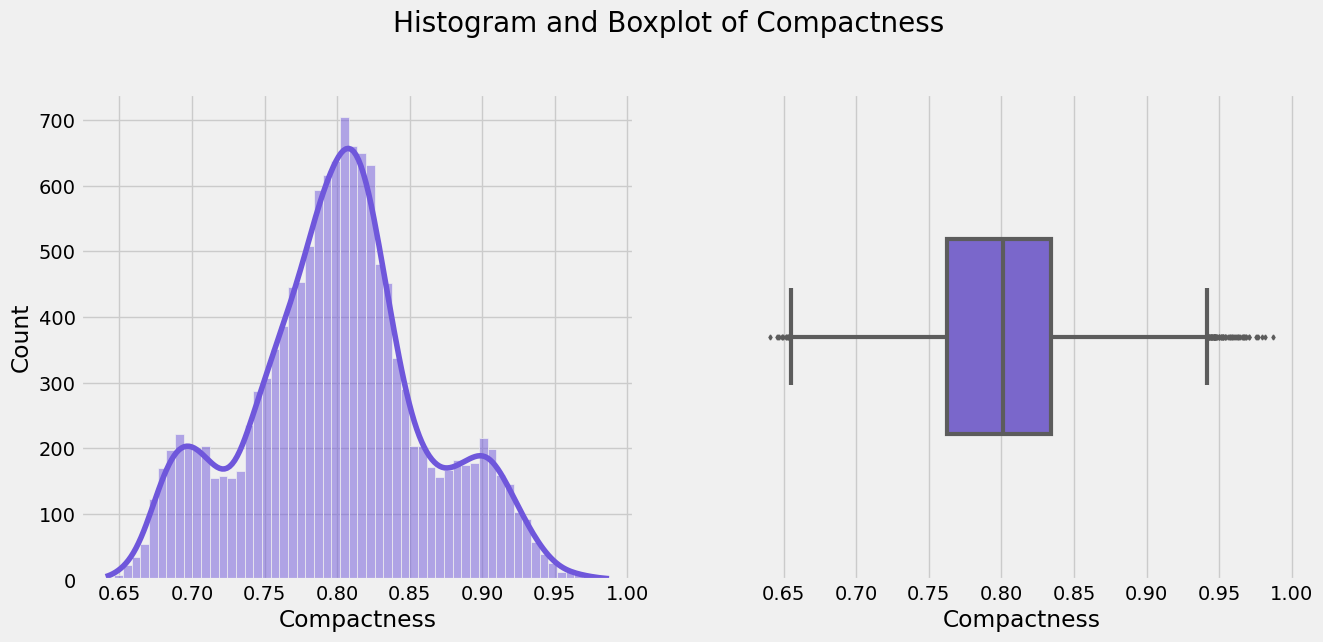

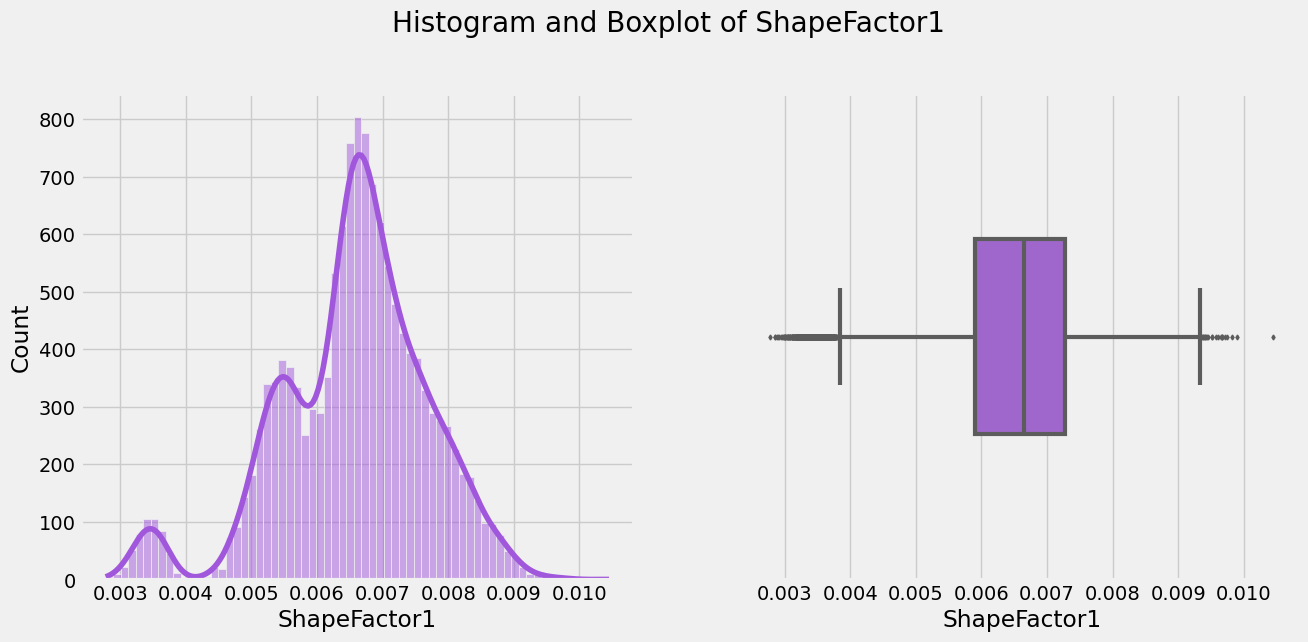

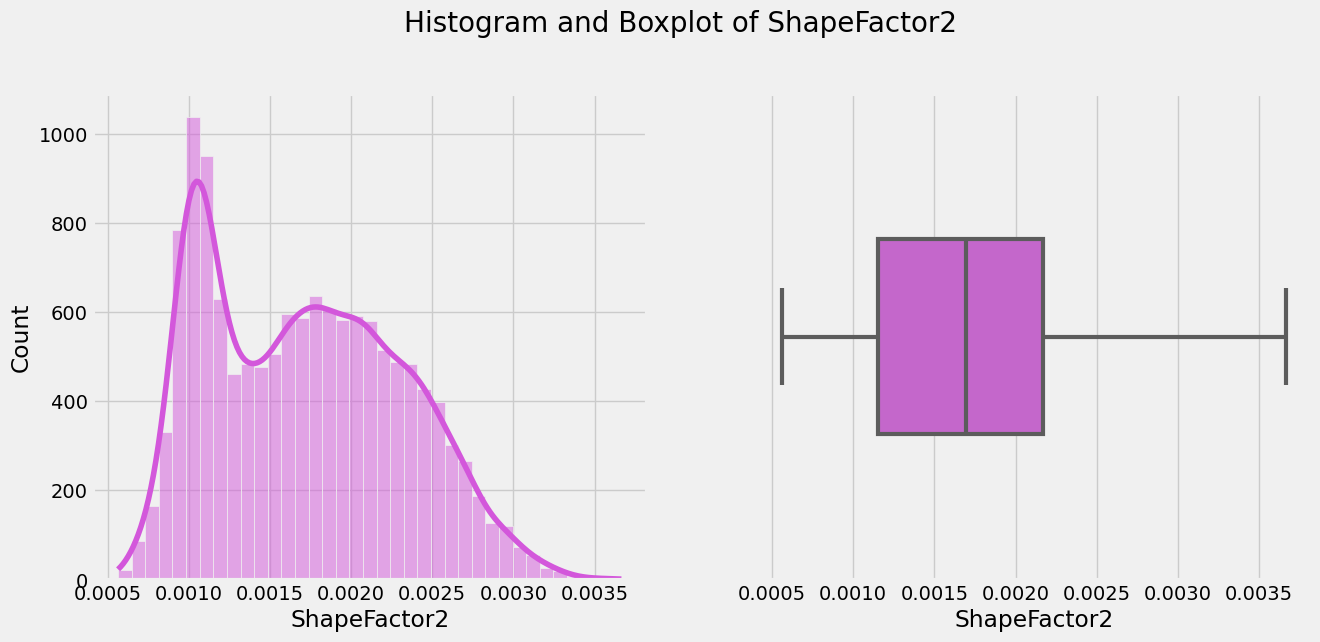

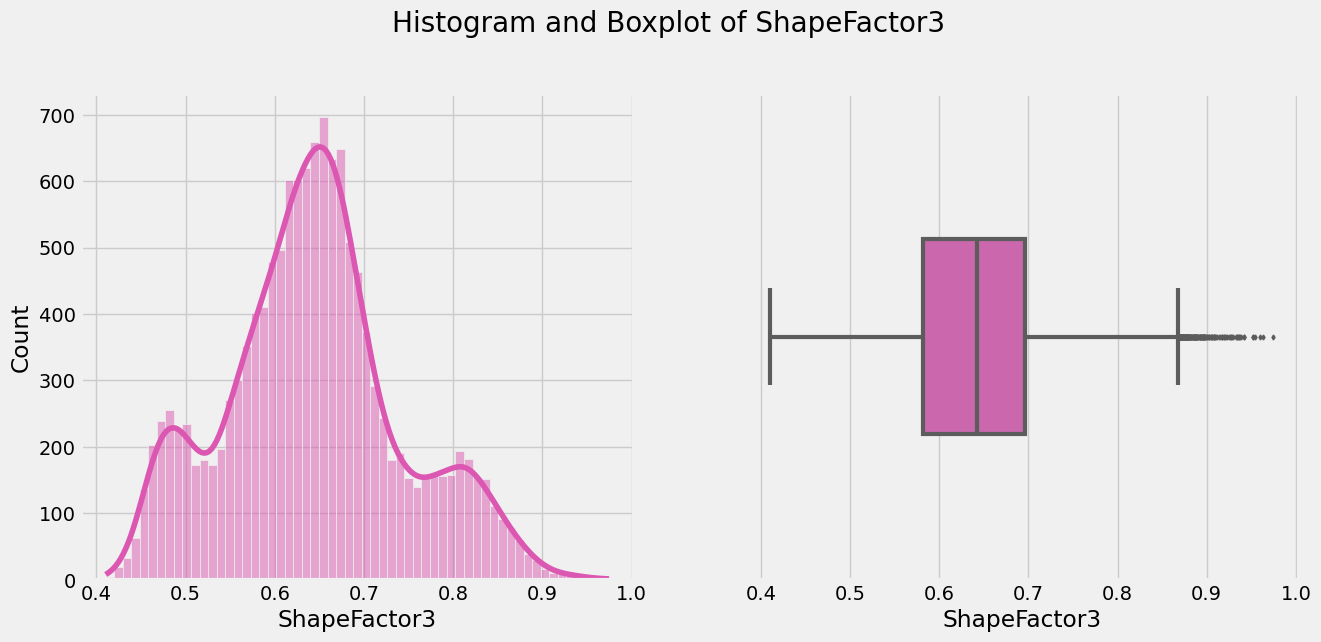

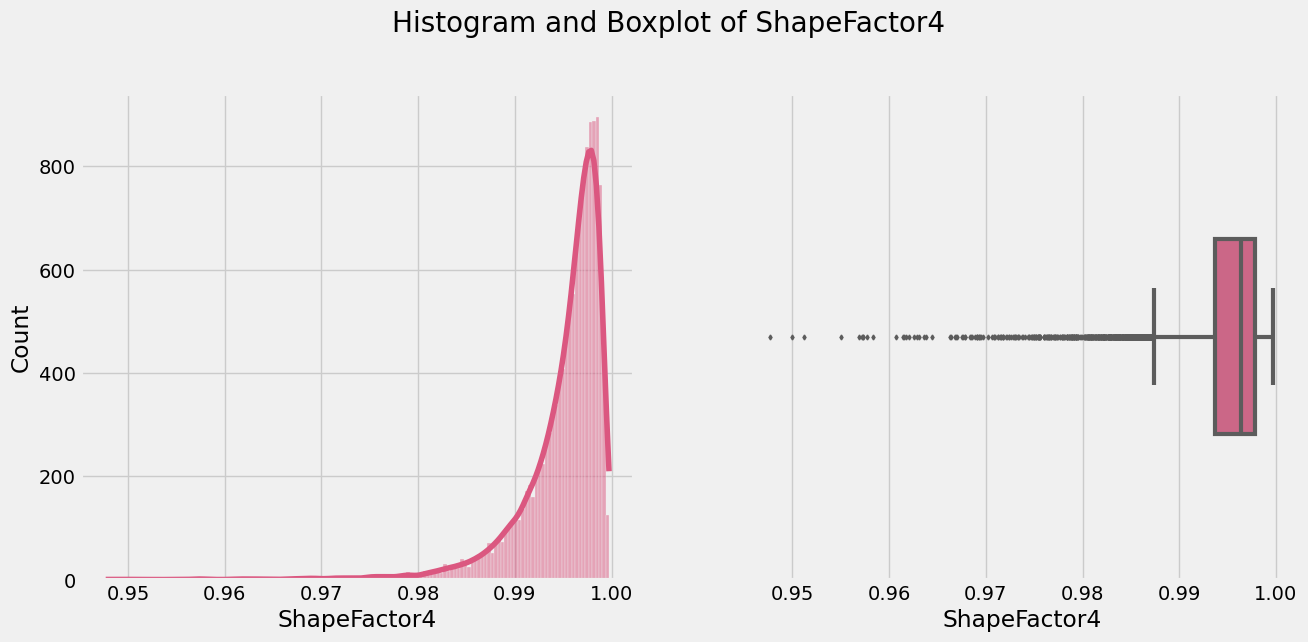

----------------------------------------------------------------------------------------------------
Countplot(s):



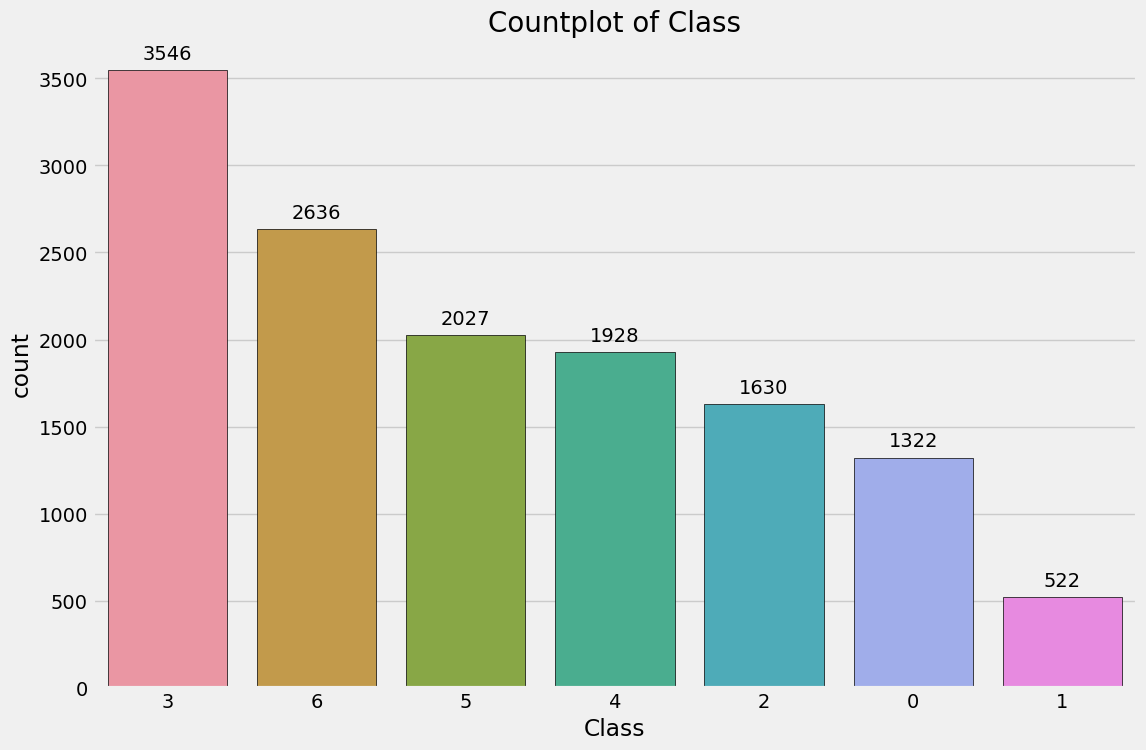

In [8]:
#analisis exploratorio de los datos
fast_eda(df)

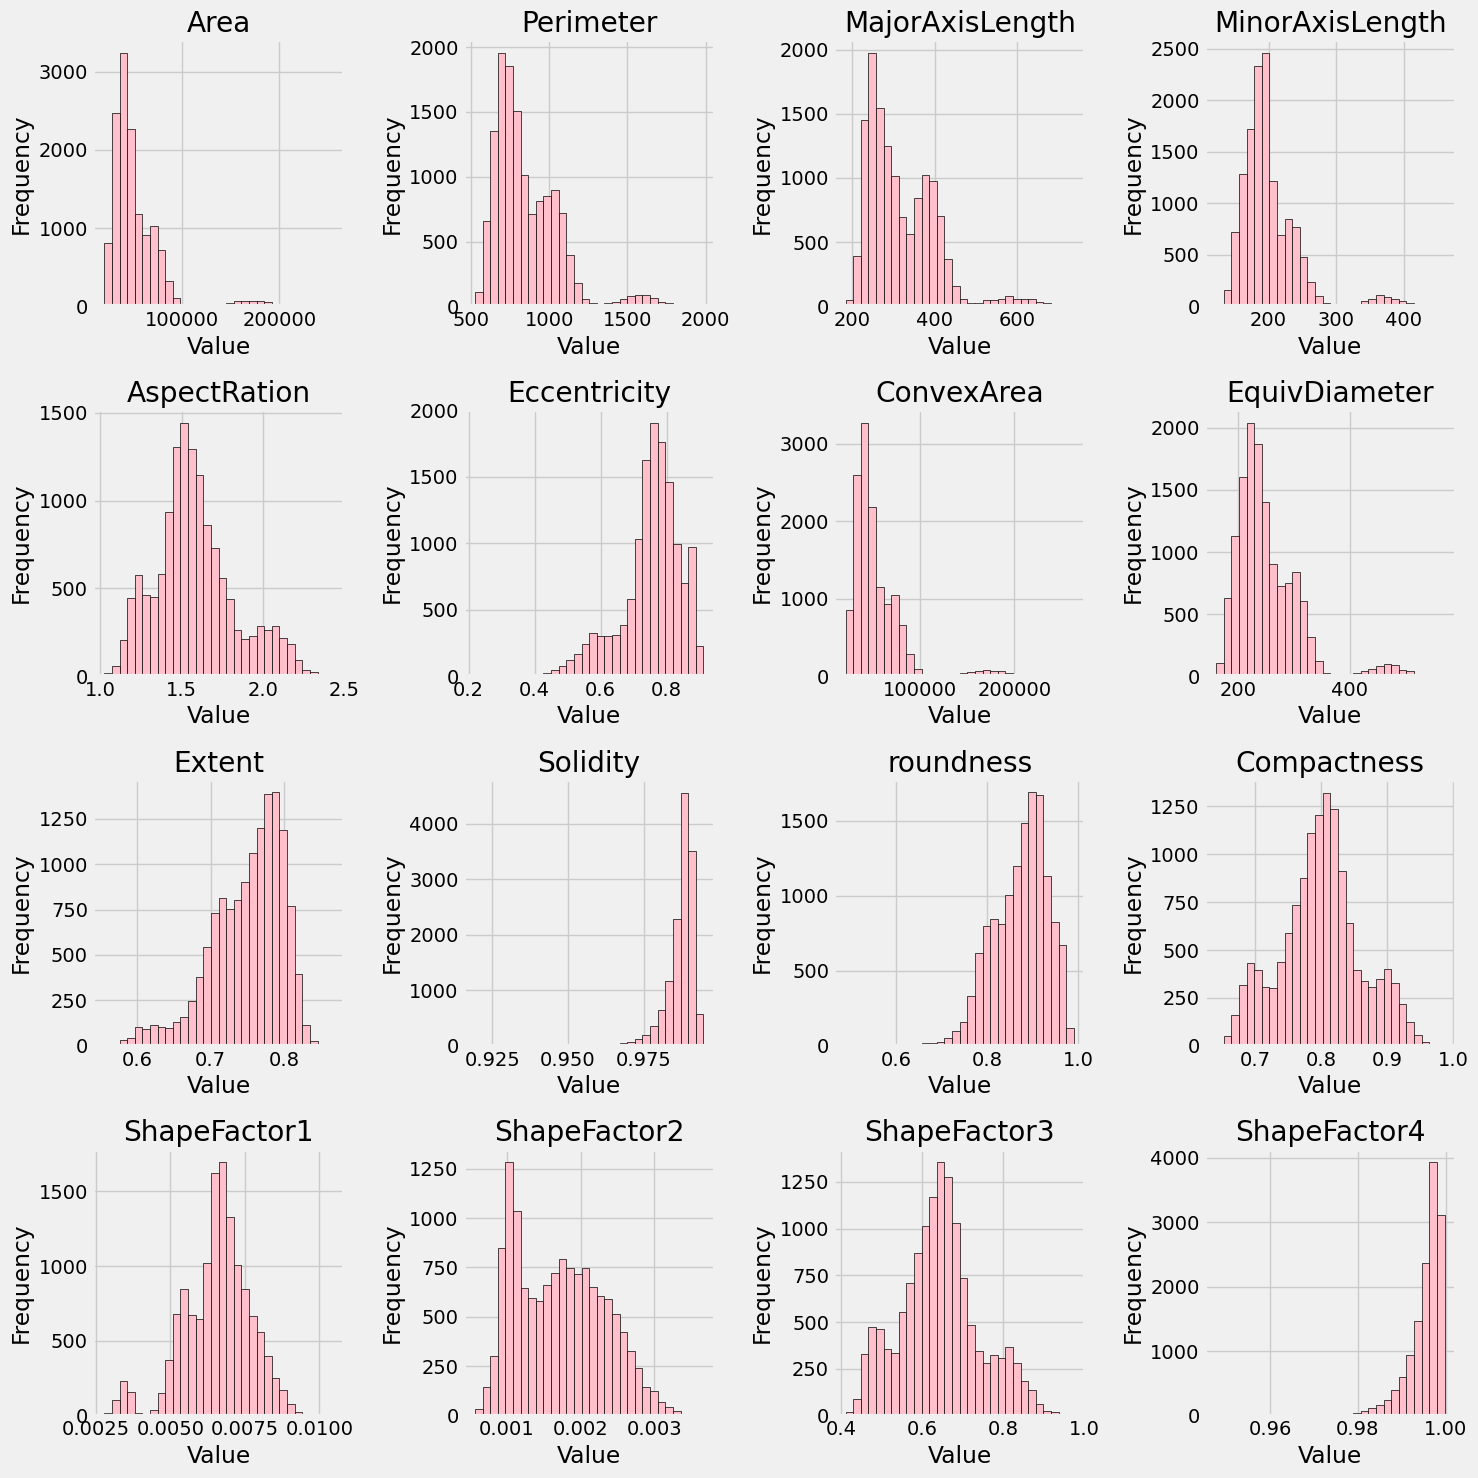

In [39]:
# Graficamos todos los histogramas en una única figura
features = df.drop('Class', axis=1)

# Crear la figura con subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
axes = axes.ravel()

# Generar un histograma para cada característica
for idx, col in enumerate(features.columns):
    axes[idx].hist(features[col], bins=30, edgecolor='black',color="pink")
    axes[idx].set_title(col)
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
#separamos las etiqutas
X = df.drop(columns='Class')
y = df['Class']

In [10]:
#Normalizamod
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
#PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [12]:
# Calcular la varianza explicada acumulada
explained_variance = pca.explained_variance_ratio_.cumsum()

# Mostrar la varianza explicada por cada componente
explained_variance_df = pd.DataFrame({
    'Número de Componente': range(1, len(explained_variance) + 1),
    'Varianza Explicada Acumulada': explained_variance
})
print(explained_variance_df)

    Número de Componente  Varianza Explicada Acumulada
0                      1                      0.554664
1                      2                      0.818974
2                      3                      0.899040
3                      4                      0.950181
4                      5                      0.977573
5                      6                      0.989071
6                      7                      0.996048
7                      8                      0.999298
8                      9                      0.999815
9                     10                      0.999906
10                    11                      0.999971
11                    12                      0.999990
12                    13                      0.999999
13                    14                      1.000000
14                    15                      1.000000
15                    16                      1.000000


In [13]:
# Reducción de dimensionalidad utilizando PCA
pca = PCA(n_components=6)  # Usar 6 componentes principales
X_pca = pca.fit_transform(X_scaled)

#dividimos en conjunto entrenamiento+validación y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#dividimos en conjunto entrenamiento+validación en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

Random Forest

In [14]:
# Definir el modelo de Random Forest
rf = RandomForestClassifier(random_state=42)

In [15]:
#Para determinar los mejores parámetros del random forest usaremos el método 
#GridSearch con Validación cruzada
#Para cada combinación de parámetros, se realiza una validación cruzada de n divisione
#
param_grid = {
    'n_estimators': [50,75], # Número de árboles
    'max_features': [4,6], # Número de características a considerar
    'max_depth': [ 20, 25],# Profundidad máxima
    'min_samples_split': [1,2, 5],
    'min_samples_leaf': [1,2, 4],
}

#Configurarmos con validación cruzada con 5 divisiones
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

#Entrenamos el grid sobre conjunto de validacion
grid_search.fit(X_val, y_val)

#mejores parámetros
best_params = grid_search.best_params_
# Suprimir warnings
warnings.filterwarnings('ignore')
print(f"Mejores parámetros encontrados: {best_params}")



Mejores parámetros encontrados: {'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [16]:
#Entrenamos con los mejores parámetros en el conj train
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluar el modelo final en el conjunto de prueba
y_pred_rf = best_rf.predict(X_test)

print("Random Forest con los mejores parámetros:")
print(classification_report(y_test, y_pred_rf))


Random Forest con los mejores parámetros:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       261
           1       1.00      1.00      1.00       117
           2       0.92      0.96      0.94       317
           3       0.91      0.92      0.91       671
           4       0.97      0.95      0.96       408
           5       0.97      0.95      0.96       413
           6       0.86      0.87      0.87       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.92      0.92      0.92      2723



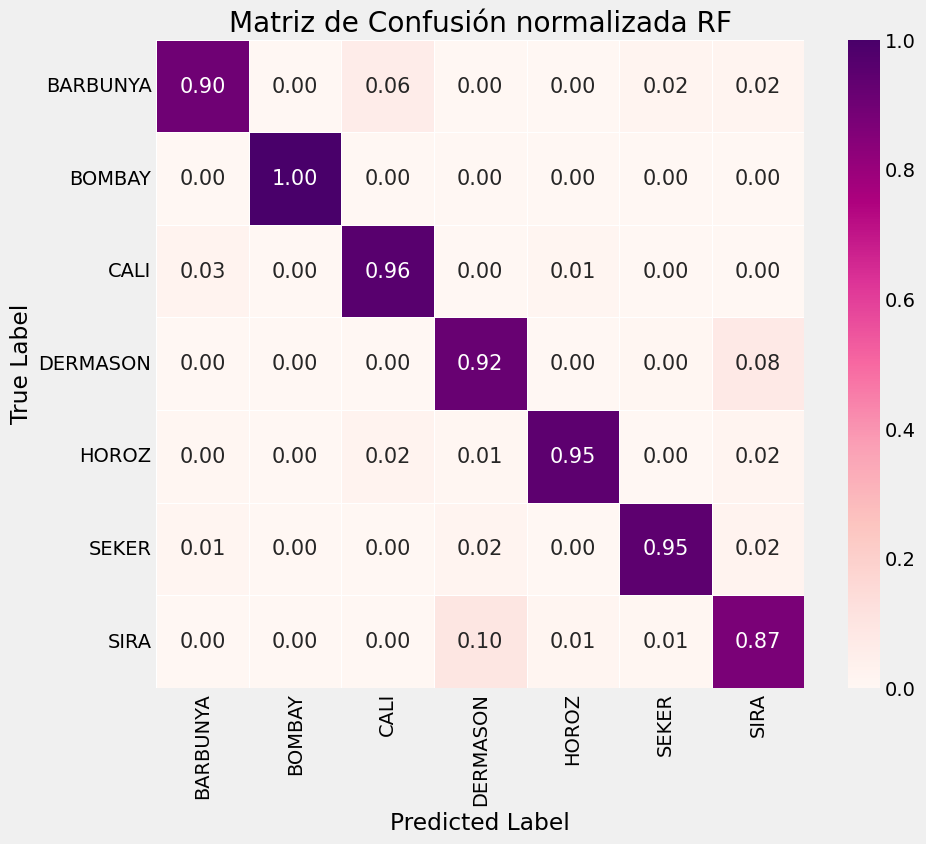

In [25]:
# Crear y mostrar la matriz de confusión normalizada
conf_matrix = confusion_matrix(y_test, y_pred_rf)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f',square=True, linewidths=.5, cmap= "RdPu", xticklabels=np.unique(labelencoder.inverse_transform(y)), yticklabels=np.unique(labelencoder.inverse_transform(y)),annot_kws={"size": 15})
plt.title("Matriz de Confusión normalizada RF")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


SVM kernel

In [19]:
# Definir el modelo de SVM
svm = SVC()

#parámetros para Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Parámetro de regularización
    'gamma': ['scale', 0.001, 0.01, 0.1, 1],  # Coeficiente del kernel
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']  # Tipos de kernel
}

# Configurar el Grid Search con validación cruzada
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Entrenar el modelo con Grid Search utilizando el conjunto de validación
grid_search.fit(X_val, y_val)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros encontrados: {best_params}")



Mejores parámetros encontrados: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [20]:
# Entrenar el modelo final con los mejores parámetros en el conjunto combinado de entrenamiento y validación
best_svm = SVC(**best_params)
best_svm.fit(X_train, y_train)

# Evaluar el modelo final en el conjunto de prueba
y_pred_SVM = best_svm.predict(X_test)

print("SVM con los mejores parámetros:")
print(classification_report(y_test, y_pred_SVM))

SVM con los mejores parámetros:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       261
           1       1.00      1.00      1.00       117
           2       0.94      0.95      0.94       317
           3       0.91      0.93      0.92       671
           4       0.97      0.94      0.96       408
           5       0.97      0.95      0.96       413
           6       0.88      0.89      0.89       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



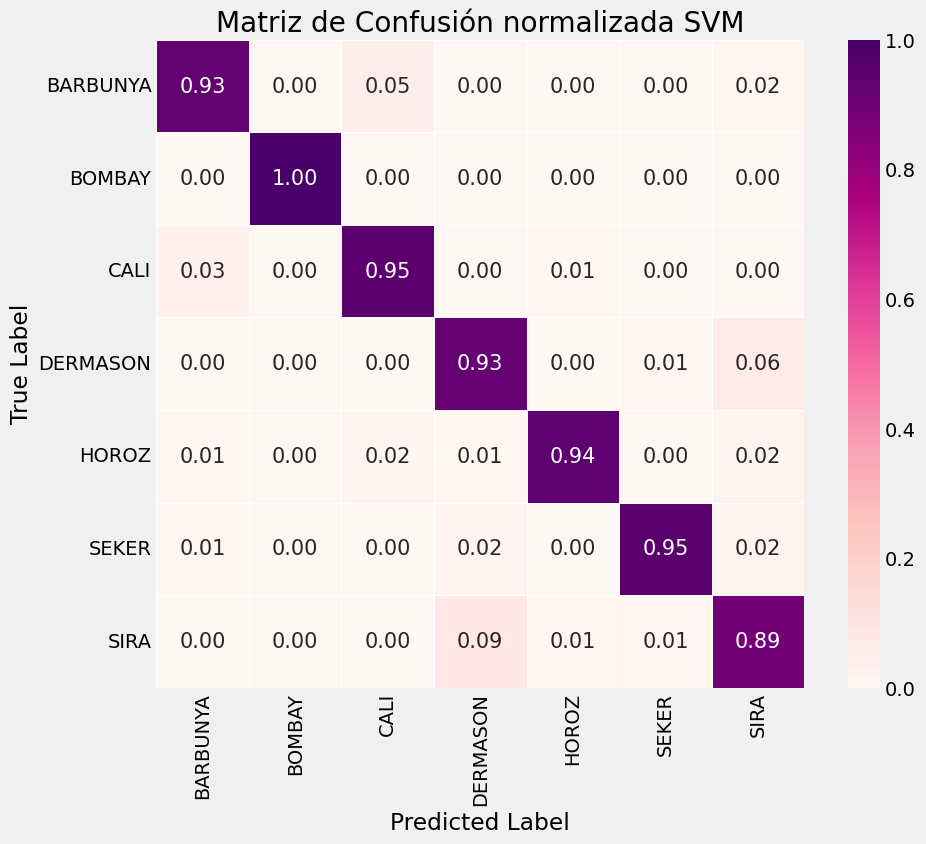

In [26]:
# Crear y mostrar la matriz de confusión normalizada
conf_matrix = confusion_matrix(y_test, y_pred_SVM)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f',square=True, linewidths=.5, cmap= "RdPu", xticklabels=np.unique(labelencoder.inverse_transform(y)), yticklabels=np.unique(labelencoder.inverse_transform(y)),annot_kws={"size": 15})
plt.title("Matriz de Confusión normalizada SVM")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Regresión logística

In [27]:
# Definir el modelo de Logistic Regression
lr = LogisticRegression(multi_class='multinomial', random_state=42)

In [31]:
#Para determinar los mejores parámetros de la regresión usaremos el método 
#GridSearch con Validación cruzada
#Para cada combinación de parámetros, se realiza una validación cruzada de n divisione
param_grid = {
    'C': [0.1, 1, 10, 100],  # Parámetro de regularización inversa
    'solver': ['newton-cg', 'lbfgs',  'saga'],  # Algoritmo de optimización
    'max_iter': [5000] # Número máximo de iteraciones
}

#Configurarmos con validación cruzada con 5 divisiones
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
#Entrenamos el grid sobre conjunto de validacion
grid_search.fit(X_val, y_val)

# Suprimir warnings
warnings.filterwarnings('ignore')

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros encontrados: {best_params}")


Mejores parámetros encontrados: {'C': 1, 'max_iter': 5000, 'solver': 'newton-cg'}


In [37]:
#Entrenamos con los mejores parámetros en el conj train
best_lr = LogisticRegression(**best_params, multi_class='multinomial', random_state=42)
best_lr.fit(X_train, y_train)

# Evaluar el modelo final en el conjunto de prueba
y_pred_lr = best_lr.predict(X_test)

print("Logistic Regression con los mejores parámetros:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression con los mejores parámetros:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       261
           1       1.00      1.00      1.00       117
           2       0.95      0.94      0.94       317
           3       0.92      0.90      0.91       671
           4       0.97      0.96      0.97       408
           5       0.96      0.94      0.95       413
           6       0.84      0.90      0.87       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.93      0.92      0.92      2723



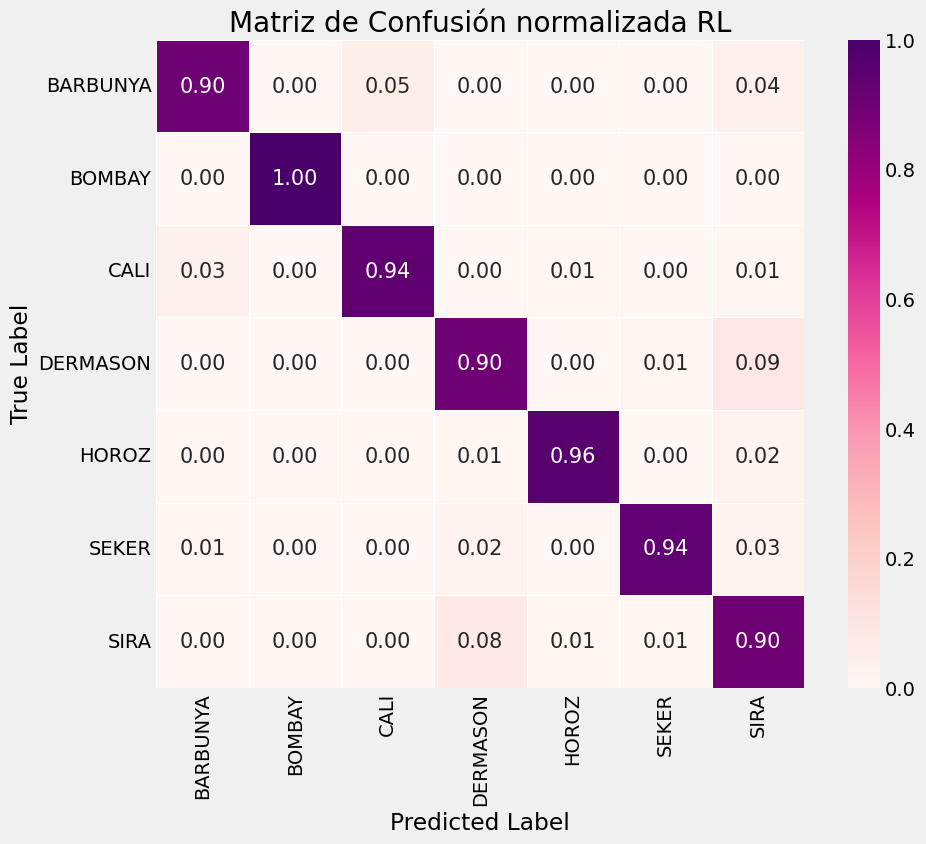

In [36]:
# Crear y mostrar la matriz de confusión normalizada
conf_matrix = confusion_matrix(y_test, y_pred_lr)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f',square=True, linewidths=.5, cmap= "RdPu", xticklabels=np.unique(labelencoder.inverse_transform(y)), yticklabels=np.unique(labelencoder.inverse_transform(y)),annot_kws={"size": 15})
plt.title("Matriz de Confusión normalizada RL")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

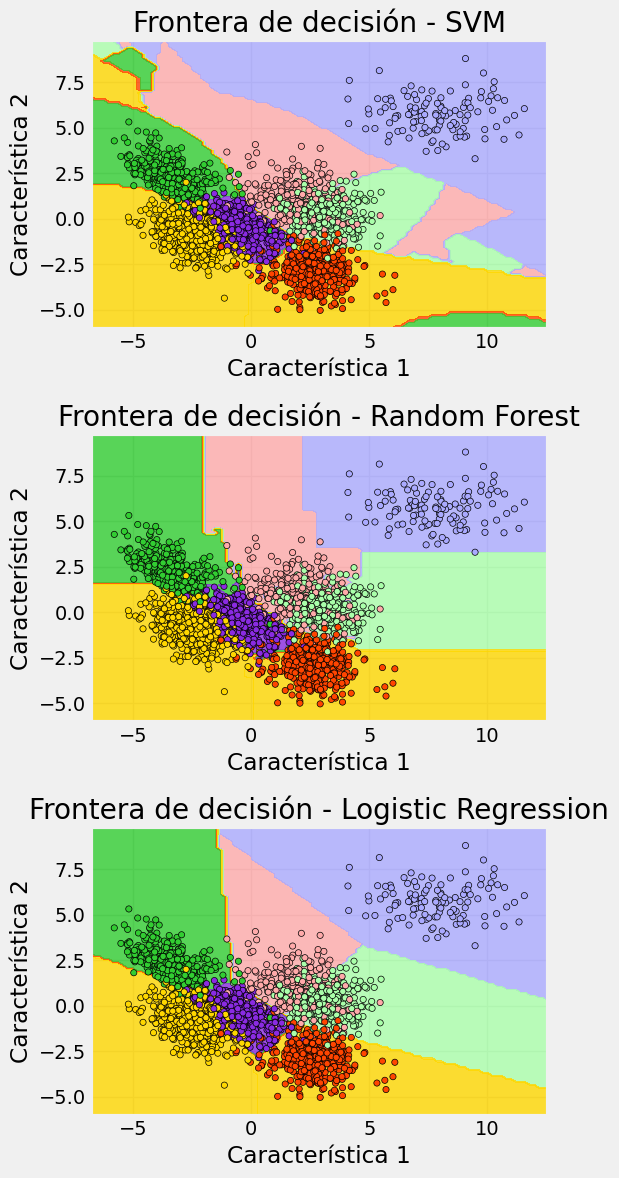

In [61]:

from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

# Supongamos que X_test contiene las dos primeras características y y_test las etiquetas reales
X_test_2D = X_test[:, :2]  # Tomar solo las dos primeras características
X_2D = X_train[:, :2] 
# List of models and titles
models = [best_svm, best_rf, best_lr]
titles = ['SVM', 'Random Forest', 'Logistic Regression']
# Crear la figura
fig, axes = plt.subplots(3, 1, figsize=(6, 12))

for model, title, ax in zip(models, titles, axes):
    # Plotting the decision boundary

    model.fit(X_2D, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        X_test_2D,
        response_method="predict",
        cmap=ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#FFD700', '#FF4500', '#32CD32', '#8A2BE2']),
        alpha=0.8,
        ax=ax,
        xlabel='Característica 1',
        ylabel='Característica 2'
    )
    ax.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, cmap=ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#FFD700', '#FF4500', '#32CD32', '#8A2BE2']), s=20, edgecolors="k",label=np.unique(labelencoder.inverse_transform(y)))
    ax.set_title(f'Frontera de decisión - {title}')

plt.tight_layout()
plt.show()


